In [12]:
# import necessary libraries

import pandas as pd
import numpy as np
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt 

#sklearn

from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, fbeta_score, make_scorer
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score






from custom_functions import get_data_summary, our_metrics, eval_metrics#, class_metrics_var_threshold


import warnings
warnings.filterwarnings('ignore')

##  try to initiate  logistic regression model without scale 

In [8]:


# unscaled Data (test_size = 0.25) :

X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv")
y_test = pd.read_csv("data/y_test.csv")

# scaled Data - minmax scaler

X_train_std = pd.read_csv("data/X_train_std.csv")
X_test_std  = pd.read_csv("data/X_test_std.csv")

# scaled Data - standard scaler

X_train_minmax  = pd.read_csv("data/X_train_minmax.csv")
X_test_minmax  = pd.read_csv("data/X_test_minmax.csv")

# minmax scaled with x_train_minmax and y_train split using test_size = 0.7

X_train_minmax_small  = pd.read_csv("data/X_train_minmax_small.csv")
X_train_minmax_large  = pd.read_csv("data/X_train_minmax_large.csv")

# standard scaler with x_train_std and y_train split using test_size = 0.7

X_train_std_small  = pd.read_csv("data/X_train_std_small.csv")
X_train_std_large  = pd.read_csv("data/X_train_std_large.csv")

y_train_small  = pd.read_csv("data/y_train_small.csv")
y_train_large  = pd.read_csv("data/y_train_large.csv")





In [37]:
# random search logistic regression 

RSEED = 42
ftwo_scorer = make_scorer(fbeta_score, beta=2)

param_grid = {
            'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
            'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
            'C' :  [10, loguniform(1e-5, 100)]#,
            #'scoring' : ['roc_auc', 'balanced_accuracy', ftwo_scorer]
    }

# log_reg = LogisticRegression()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


# log_rscv = RandomizedSearchCV(log_reg, param_grid, n_iter=10, 
#                             verbose= 5, scoring = 'roc_auc', n_jobs=-1, cv=cv, random_state=RSEED)

# log_fit = log_rscv.fit(X_train_minmax_small, y_train_small)


In [13]:
# best score and hyperparameters

# print('Best Score: %s' % log_fit.best_score_)
# print('Best Hyperparameters: %s' % log_fit.best_params_)


Best Score: 0.6532951295662254
Best Hyperparameters: {'solver': 'lbfgs', 'penalty': 'none', 'C': 10}


* Best Score: 0.6532951295662254
* Best Hyperparameters: {'solver': 'lbfgs', 'penalty': 'none', 'C': 10}

In [16]:

# training with best
# roc_auc score of 0.65

best_param = {
            'solver' : 'lbfgs',
            'penalty' : 'none',
            'C' :  10
    }


log_model = LogisticRegression(**best_param)
log_model.fit(X_train_minmax, y_train)




LogisticRegression(C=10, penalty='none')

In [17]:
# predict

y_pred_train = log_model.predict(X_train_minmax)
y_pred_test = log_model.predict(X_test_minmax)



ROC_AUC train : 0.5014444893925611
precision train : 0.5123001230012301
balanced accuracy train : 0.5014444893925611
____________________________________________________________
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.9211
_____________________
F1-score: 0.0063
_____________________
Fbeta_score with beta=1.5: 0.0045
_____________________
Fbeta_score with beta=2: 0.0039
_____________________
Fbeta_score with beta=3: 0.0035
_____________________
Recall 0.0031
_____________________
Specificity 0.9997
____________________________________________________________


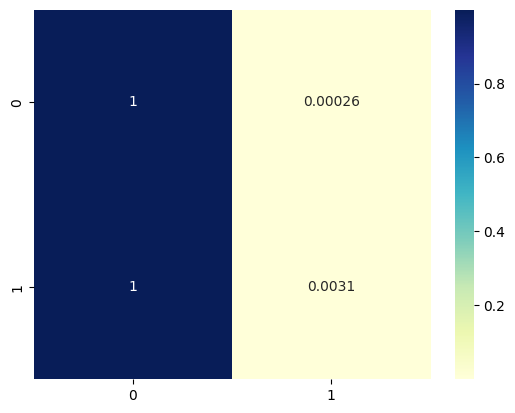

In [22]:
# evaluate model

print(f"ROC_AUC train : {roc_auc_score(y_train, y_pred_train)}")
print(f"precision train : {precision_score(y_train, y_pred_train)}")
print(f"balanced accuracy train : {balanced_accuracy_score(y_train, y_pred_train)}")

print('______'*10)

our_metrics(y_train, y_pred_train)

print('______'*10)


ROC_AUC test : 0.501529063446735
precision test : 0.5534351145038168
balanced accuracy test : 0.5015290634467349
____________________________________________________________
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.9212
_____________________
F1-score: 0.0065
_____________________
Fbeta_score with beta=1.5: 0.0047
_____________________
Fbeta_score with beta=2: 0.0041
_____________________
Fbeta_score with beta=3: 0.0036
_____________________
Recall 0.0033
_____________________
Specificity 0.9998
____________________________________________________________


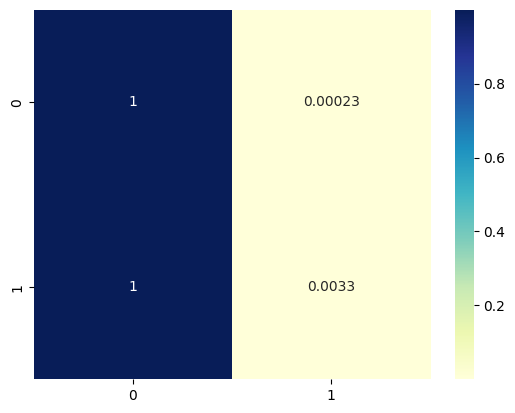

In [23]:
# evaluate model


print(f"ROC_AUC test : {roc_auc_score(y_test, y_pred_test)}")
print(f"precision test : {precision_score(y_test, y_pred_test)}")
print(f"balanced accuracy test : {balanced_accuracy_score(y_test, y_pred_test)}")

print('______'*10)

our_metrics(y_test, y_pred_test)

print('______'*10)


In [70]:
# training with best
# roc_auc score of 0.65

best_param = {
            'solver' : 'lbfgs',
            'penalty' : 'none',
            'C' :  10
    }


log_model1 = LogisticRegression(**best_param)
log_model1.fit(X_train_std, y_train)

# predict

y_pred_train_sd = log_model1.predict(X_train_std)
y_pred_test_sd = log_model1.predict(X_test_std)

ROC_AUC test : 0.5015196755276687
precision test : 0.555984555984556
balanced accuracy test : 0.5015196755276686
____________________________________________________________
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.9212
_____________________
F1-score: 0.0065
_____________________
Fbeta_score with beta=1.5: 0.0047
_____________________
Fbeta_score with beta=2: 0.0041
_____________________
Fbeta_score with beta=3: 0.0036
_____________________
Recall 0.0033
_____________________
Specificity 0.9998
____________________________________________________________


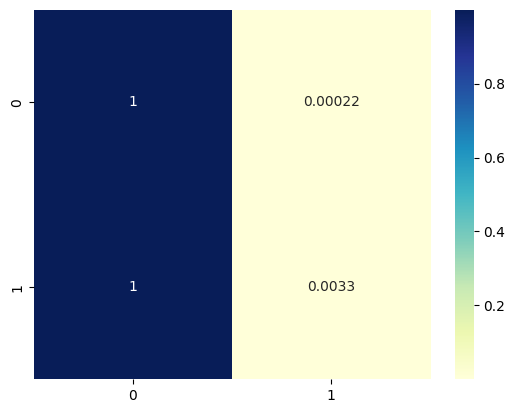

In [71]:
# evaluate model : X_test_std, y_pred_test_std


print(f"ROC_AUC test : {roc_auc_score(y_test, y_pred_test_sd)}")
print(f"precision test : {precision_score(y_test, y_pred_test_sd)}")
print(f"balanced accuracy test : {balanced_accuracy_score(y_test, y_pred_test_sd)}")

print('______'*10)

our_metrics(y_test, y_pred_test_sd)

print('______'*10)


In [92]:
def class_metrics_var_threshold(fitted_model, X_test, y_test, threshold=0.5):
    """
    function to compute confusion matrix and classification metrics based on passed threshold.
    required arguments: fitted model, X_test, y_test, threshold (float, default >= 0.5)
    """
    # predicted probabilities based on fitted model
    proba = fitted_model.predict_proba(X_test)
    
    # predicted y based on passed threshold
    y_pred = [int(i>=threshold) for i in proba[:,1]]

    # random line for nicer output :)
    print('____________________')

    # confusion matrix of actual y and predicted y
    print ('Confusion Matrix :')
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    print('____________________')

    # ROC AUC Score score of actual y and predicted y
    print ('ROC AUC Score :', round(roc_auc_score(y_test, y_pred), 4))
    print('____________________')

    # FBeta Score score of actual y and predicted y
    print ('FBeta Score, Beta = 2 :', round(fbeta_score(y_test, y_pred, beta=2), 4))
    print('____________________')

    # accuracy score of confusion matrix
    print ('Accuracy Score :', round(accuracy_score(y_test, y_pred), 4))
    print('____________________')

    # classification report of confusion matrix
    print ('Report : ')
    print (classification_report(y_test, y_pred) )
    print('____________________')

    return proba



In [93]:
# compute probabilities minmax

#pred_prob_train = class_metrics_var_threshold(log_model, X_train_minmax, y_train, threshold=0.5)
pred_prob_test = class_metrics_var_threshold(log_model, X_test_minmax, y_test, threshold=0.5)




____________________
Confusion Matrix :
[[1030662     234]
 [  87987     290]]
____________________
ROC AUC Score : 0.5015
____________________
FBeta Score, Beta = 2 : 0.0041
____________________
Accuracy Score : 0.9212
____________________
Report : 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96   1030896
           1       0.55      0.00      0.01     88277

    accuracy                           0.92   1119173
   macro avg       0.74      0.50      0.48   1119173
weighted avg       0.89      0.92      0.88   1119173

____________________


In [94]:
# compute probabilities :std threshold = 0.5

#pred_prob_train_1 = class_metrics_var_threshold(log_model, X_train_std, y_train, threshold=0.5)
pred_prob_test_1 = class_metrics_var_threshold(log_model, X_test_std, y_test, threshold=0.5)




____________________
Confusion Matrix :
[[785650 245246]
 [ 56546  31731]]
____________________
ROC AUC Score : 0.5608
____________________
FBeta Score, Beta = 2 : 0.2518
____________________
Accuracy Score : 0.7303
____________________
Report : 
              precision    recall  f1-score   support

           0       0.93      0.76      0.84   1030896
           1       0.11      0.36      0.17     88277

    accuracy                           0.73   1119173
   macro avg       0.52      0.56      0.51   1119173
weighted avg       0.87      0.73      0.79   1119173

____________________


In [95]:
# compute probabilities :std

pred_prob_test_11 = class_metrics_var_threshold(log_model1, X_test_std, y_test, threshold=0.5)




____________________
Confusion Matrix :
[[1030666     230]
 [  87989     288]]
____________________
ROC AUC Score : 0.5015
____________________
FBeta Score, Beta = 2 : 0.0041
____________________
Accuracy Score : 0.9212
____________________
Report : 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96   1030896
           1       0.56      0.00      0.01     88277

    accuracy                           0.92   1119173
   macro avg       0.74      0.50      0.48   1119173
weighted avg       0.89      0.92      0.88   1119173

____________________


In [100]:
# compute probabilities threshold = 0.6

#pred_prob_train_2 = class_metrics_var_threshold(log_model, X_train_std, y_train, threshold=0.6)
pred_prob_test_2 = class_metrics_var_threshold(log_model, X_test_std, y_test, threshold=0.6)


____________________
Confusion Matrix :
[[847525 183371]
 [ 62760  25517]]
____________________
ROC AUC Score : 0.5556
____________________
FBeta Score, Beta = 2 : 0.227
____________________
Accuracy Score : 0.7801
____________________
Report : 
              precision    recall  f1-score   support

           0       0.93      0.82      0.87   1030896
           1       0.12      0.29      0.17     88277

    accuracy                           0.78   1119173
   macro avg       0.53      0.56      0.52   1119173
weighted avg       0.87      0.78      0.82   1119173

____________________


In [96]:
# compute probabilities threshold = 0.4

#pred_prob_train_2 = class_metrics_var_threshold(log_model, X_train_std, y_train, threshold=0.4)
pred_prob_test_3 = class_metrics_var_threshold(log_model, X_test_std, y_test, threshold=0.4)


____________________
Confusion Matrix :
[[724288 306608]
 [ 50592  37685]]
____________________
ROC AUC Score : 0.5647
____________________
FBeta Score, Beta = 2 : 0.2702
____________________
Accuracy Score : 0.6808
____________________
Report : 
              precision    recall  f1-score   support

           0       0.93      0.70      0.80   1030896
           1       0.11      0.43      0.17     88277

    accuracy                           0.68   1119173
   macro avg       0.52      0.56      0.49   1119173
weighted avg       0.87      0.68      0.75   1119173

____________________


In [102]:
# compute probabilities threshold = 0.25

#pred_prob_train_2 = class_metrics_var_threshold(log_model, X_train_std, y_train, threshold=0.25)
pred_prob_test_4 = class_metrics_var_threshold(log_model, X_test_std, y_test, threshold=0.25)


____________________
Confusion Matrix :
[[622719 408177]
 [ 41256  47021]]
____________________
ROC AUC Score : 0.5684
____________________
FBeta Score, Beta = 2 : 0.2909
____________________
Accuracy Score : 0.5984
____________________
Report : 
              precision    recall  f1-score   support

           0       0.94      0.60      0.73   1030896
           1       0.10      0.53      0.17     88277

    accuracy                           0.60   1119173
   macro avg       0.52      0.57      0.45   1119173
weighted avg       0.87      0.60      0.69   1119173

____________________


In [103]:
# compute probabilities threshold = 0.1

#pred_prob_train_2 = class_metrics_var_threshold(log_model, X_train_std, y_train, threshold=0.1)
pred_prob_test_5 = class_metrics_var_threshold(log_model, X_test_std, y_test, threshold=0.1)


____________________
Confusion Matrix :
[[461312 569584]
 [ 27238  61039]]
____________________
ROC AUC Score : 0.5695
____________________
FBeta Score, Beta = 2 : 0.3102
____________________
Accuracy Score : 0.4667
____________________
Report : 
              precision    recall  f1-score   support

           0       0.94      0.45      0.61   1030896
           1       0.10      0.69      0.17     88277

    accuracy                           0.47   1119173
   macro avg       0.52      0.57      0.39   1119173
weighted avg       0.88      0.47      0.57   1119173

____________________


In [104]:
# replace_column names to original column names
cols = X_test.columns.to_list()

x_test_minmax = X_test_minmax.copy(deep=True)
x_test_std = X_test_std.copy(deep=True)


x_test_minmax.columns = cols
x_test_std.columns = cols



In [148]:
# store in dataframe

df_prob_test_mm = pd.DataFrame(data=pred_prob_test, columns=['no_fraud_prob_lrmm','fraud_prob_lrmm'])
df_prob_test_sd = pd.DataFrame(data=pred_prob_test_1, columns=['no_fraud_prob_lrsd','fraud_prob_lrsd'])
df_prob_test_06 = pd.DataFrame(data=pred_prob_test_2, columns=['no_fraud_prob_lr06','fraud_prob_lr06'])
df_prob_test_04 = pd.DataFrame(data=pred_prob_test_3, columns=['no_fraud_prob_lr04','fraud_prob_lr04'])
df_prob_test_025 = pd.DataFrame(data=pred_prob_test_4, columns=['no_fraud_prob_lr025','fraud_prob_lr025'])
df_prob_test_01 = pd.DataFrame(data=pred_prob_test_5, columns=['no_fraud_prob_lr01','fraud_prob_lr01'])

df_y_test = pd.DataFrame(data=y_test, columns=['target'])
df_y_test_pred = pd.DataFrame(data=y_pred_test, columns=['fraud_pred_lr'])

# df_test_preds_lr = pd.concat([x_test_minmax, x_test_std, df_y_test, df_y_test_pred,
#                     df_prob_t05_mm, df_prob_test_sd, df_prob_test_06, df_prob_test_04, 
#                                 df_prob_test_025,  df_prob_test_01], axis=1)

df_test_preds_lr = pd.concat([x_test_minmax, x_test_std, df_y_test, 
                            df_y_test_pred, df_prob_test_mm, df_prob_test_sd], axis=1)
df_test_preds_lr.head()



,member_years,index_change_month,quantity_counters,client_catg_12,client_catg_51,region_103,region_104,region_105,region_106,region_107,...,reading_remarque_7,reading_remarque_8,reading_remarque_9,counter_type_GAZ,target,fraud_pred_lr,no_fraud_prob_lrmm,fraud_prob_lrmm,no_fraud_prob_lrsd,fraud_prob_lrsd
0,0.261905,0.784404,0.130137,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,0,0.914634,0.085366,0.763572,0.236428
1,0.119048,0.784407,0.152968,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0.864962,0.135038,0.559889,0.440111
2,0.095238,0.784391,0.107306,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0.867971,0.132029,0.862402,0.137598
3,0.666667,0.784717,0.139269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0.945326,0.054674,0.667667,0.332333
4,0.476190,0.784395,0.134703,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0,0,0.824911,0.175089,0.418888,0.581112


In [149]:
# 


df_test_preds_lr['pred_corr']= (df_test_preds_lr['target'] == df_test_preds_lr['fraud_pred_lr'])




In [150]:

df_test_preds_lr.head()


,member_years,index_change_month,quantity_counters,client_catg_12,client_catg_51,region_103,region_104,region_105,region_106,region_107,...,reading_remarque_8,reading_remarque_9,counter_type_GAZ,target,fraud_pred_lr,no_fraud_prob_lrmm,fraud_prob_lrmm,no_fraud_prob_lrsd,fraud_prob_lrsd,pred_corr
0,0.261905,0.784404,0.130137,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0,0,0.914634,0.085366,0.763572,0.236428,True
1,0.119048,0.784407,0.152968,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0.864962,0.135038,0.559889,0.440111,True
2,0.095238,0.784391,0.107306,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0.867971,0.132029,0.862402,0.137598,True
3,0.666667,0.784717,0.139269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.945326,0.054674,0.667667,0.332333,True
4,0.476190,0.784395,0.134703,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0,0,0.824911,0.175089,0.418888,0.581112,True


In [152]:

df_false_pred = df_test_preds_lr.query('target != fraud_pred_lr')

df_false_pred

,member_years,index_change_month,quantity_counters,client_catg_12,client_catg_51,region_103,region_104,region_105,region_106,region_107,...,reading_remarque_8,reading_remarque_9,counter_type_GAZ,target,fraud_pred_lr,no_fraud_prob_lrmm,fraud_prob_lrmm,no_fraud_prob_lrsd,fraud_prob_lrsd,pred_corr
50,0.166667,0.785148,0.114155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1,0,0.963737,0.036263,0.973966,0.026034,False
83,0.023810,0.784393,0.102740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1,0,0.924615,0.075385,0.941909,0.058091,False
92,0.095238,0.784438,0.068493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0.949501,0.050499,0.985720,0.014280,False
96,0.095238,0.784391,0.100457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0.914144,0.085856,0.927356,0.072644,False
113,0.095238,0.785426,0.349315,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1,0,0.878793,0.121207,0.006160,0.993840,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119039,0.500000,0.784391,0.184932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0.907564,0.092436,0.208170,0.791830,False
1119040,0.047619,0.784399,0.068493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1,0,0.948348,0.051652,0.986411,0.013589,False
1119072,0.571429,0.784517,0.086758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0.944307,0.055693,0.920985,0.079015,False
1119157,0.619048,0.784464,0.109589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0.950718,0.049282,0.838937,0.161063,False


In [153]:
### saving for use in other notebook

df_test_preds_lr.to_csv('data/df_test_lrpreds.csv', index=False, chunksize=len(df_test_preds_lr)//8)






# Baseline


In [154]:

# cleaned data used in modelling notebook

df_processed = pd.read_csv('data/df_processed_dmy.csv')


In [155]:


## Defining baseline model that predicts no one commits fraud
def baseline_model(df):
    y_pred = [0 for x in df.index]
    return y_pred

# Compute predictions with baseline model  1 for test set

y_pred_baseline_1 = baseline_model(X_test)
y_pred_baseline_11 = baseline_model(x_test_std)


# Defining baseline model that predicts no one commits fraud for 
#  index change with respect to consuption per month <= 15% is fraud


quantile_idx = df_processed[['index_change_month']].quantile(q=0.15)[0]
quantile_idx

def baseline_model_idx(df, quantile_idx):
    y_pred = [1 if x <= quantile_idx else 0 for x in df['index_change_month']]
    return y_pred

# Compute predictions with baseline modelv2 for test set
y_pred_baseline_2 = baseline_model_idx(X_test, quantile_idx)
y_pred_baseline_21 = baseline_model_idx(x_test_std, quantile_idx)




Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.9211
_____________________
F1-score: 0.0
_____________________
Fbeta_score with beta=1.5: 0.0
_____________________
Fbeta_score with beta=2: 0.0
_____________________
Fbeta_score with beta=3: 0.0
_____________________
Recall 0.0
_____________________
Specificity 1.0
Baseline 1 Metrics:  
 None


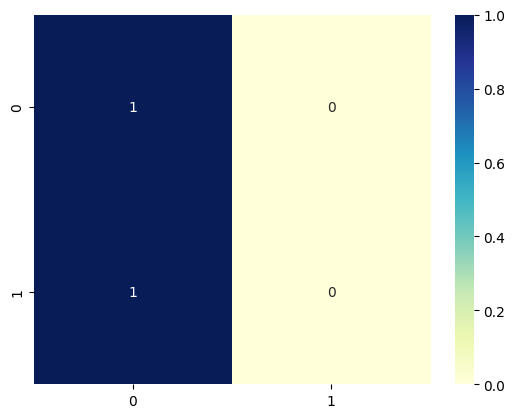

In [120]:
# compute probabilities , std threshold = 0.5
# baseline 1

print(f'Baseline 1 Metrics:  \n {our_metrics(y_test, y_pred_baseline_1)}')




Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.9211
_____________________
F1-score: 0.0
_____________________
Fbeta_score with beta=1.5: 0.0
_____________________
Fbeta_score with beta=2: 0.0
_____________________
Fbeta_score with beta=3: 0.0
_____________________
Recall 0.0
_____________________
Specificity 1.0
Baseline 1 Metrics:  
 None


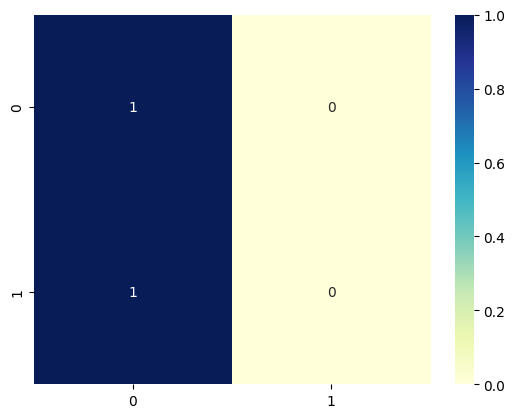

In [121]:
# compute probabilities , std threshold = 0.5
# baseline 1 , X_test_std

print(f'Baseline 1 Metrics:  \n {our_metrics(y_test, y_pred_baseline_11)}')




Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.7922
_____________________
F1-score: 0.0979
_____________________
Fbeta_score with beta=1.5: 0.1114
_____________________
Fbeta_score with beta=2: 0.1207
_____________________
Fbeta_score with beta=3: 0.1309
_____________________
Recall 0.1429
_____________________
Specificity 0.8478
Baseline 2 Metrics:  
 None


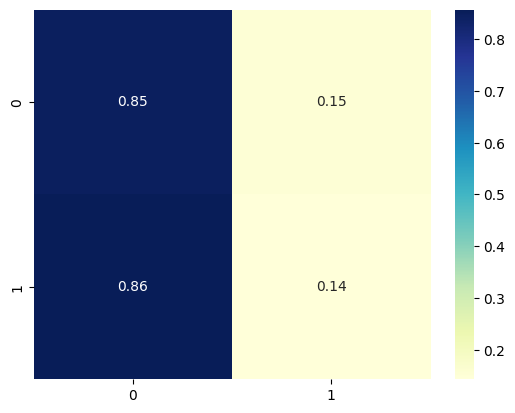

In [122]:
# compute probabilities , std threshold = 0.5
# baseline 2 , X_test

print(f'Baseline 2 Metrics:  \n {our_metrics(y_test, y_pred_baseline_2)}')



Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.0791
_____________________
F1-score: 0.1462
_____________________
Fbeta_score with beta=1.5: 0.2177
_____________________
Fbeta_score with beta=2: 0.2997
_____________________
Fbeta_score with beta=3: 0.4612
_____________________
Recall 0.9996
_____________________
Specificity 0.0003
Baseline 2 Metrics:  
 None


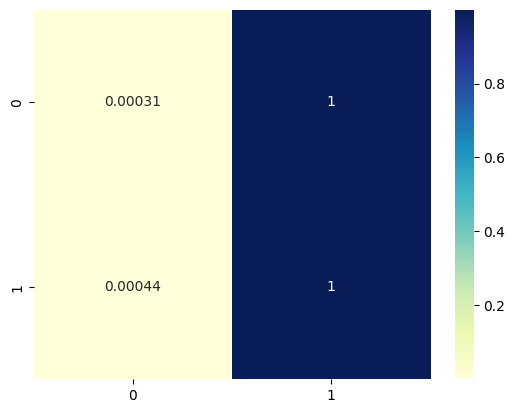

In [123]:
# compute probabilities , std threshold = 0.5
# baseline 2 , X_test_std

print(f'Baseline 2 Metrics:  \n {our_metrics(y_test, y_pred_baseline_21)}')



Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.9212
_____________________
F1-score: 0.0065
_____________________
Fbeta_score with beta=1.5: 0.0047
_____________________
Fbeta_score with beta=2: 0.0041
_____________________
Fbeta_score with beta=3: 0.0036
_____________________
Recall 0.0033
_____________________
Specificity 0.9998
Baseline 2 Metrics:  
 None


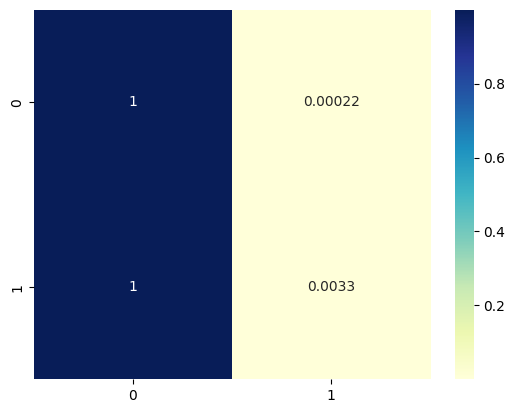

In [156]:
# compute probabilities , std threshold = 0.5
# baseline 2 , X_test_std

print(f'Baseline 2 Metrics:  \n {our_metrics(y_test, y_pred_test_sd)}')



# Baseline 2

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.7922
_____________________
F1-score: 0.0979
_____________________
Fbeta_score with beta=1.5: 0.1114
_____________________
Fbeta_score with beta=2: 0.1207
_____________________
Fbeta_score with beta=3: 0.1309
_____________________
Recall 0.1429
_____________________
Specificity 0.8478


---
---

##  Logostic Regression model

____________________
Confusion Matrix :
<br/>
[[785650 || 245246]
<br/>
 [ 56546 || 31731]]
____________________
ROC AUC Score : 0.5608
____________________
FBeta Score, Beta = 2 : 0.2518
____________________
Accuracy Score : 0.7303
____________________
Report : 
              precision    recall  f1-score   support

           0       0.93      0.76      0.84   1030896
           1       0.11      0.36      0.17     88277

    accuracy                           0.73   1119173
    
   macro avg       0.52      0.56      0.51   1119173
weighted avg       0.87      0.73      0.79   1119173

____________________

In [157]:
# True positive rate: TP/(TP+FN) = 785650 / 1030896 = 0.76
tpr = 0.76
# False positive rate: FP/(TN+FP) = 31731 / 88277 = 0.36
fpr = 0.39
# target value count
# 0    4123581
# 1     353109
total_loss = 200000000
num_fraud = 353109
avg_loss = total_loss / num_fraud
cost_falsely_acc = 0
gain_per_client = avg_loss * tpr - cost_falsely_acc * fpr
gain_per_client

430.46198199422844

In [133]:
# expected gain during next period by detecting fraud in 63% of the fraud cases
total_gain = 0.63 * total_loss
total_gain

126000000.0

In [159]:
# stat summary


df_test_preds_lr.groupby('target')[['member_years','index_change_month', 'quantity_counters']].describe().T


target                               0             1
member_years       count  1.030896e+06  88277.000000
                   mean   3.224795e-01      0.366768
                   std    2.419332e-01      0.244836
                   min    0.000000e+00      0.000000
                   25%    1.190476e-01      0.142857
                   50%    2.619048e-01      0.333333
                   75%    5.000000e-01      0.571429
                   max    1.000000e+00      1.000000
                   count  1.030896e+06  88277.000000
                   mean  -1.541082e-02      0.167278
                   std    9.979754e-01      1.009949
                   min   -1.345640e+00     -1.345640
                   25%   -8.545681e-01     -0.756354
                   50%   -2.652819e-01      0.029361
                   75%    7.168618e-01      1.011505
                   max    2.779364e+00      2.779364
index_change_month count  1.030896e+06  88277.000000
                   mean   7.845107e-01      0.784568
                   std    1.749239e-03      0.001046
                   min    1.516875e-03      0.706500
                   25%    7.844062e-01      0.784408
                   50%    7.844508e-01      0.784452
                   75%    7.845134e-01      0.784535
                   max    8.426535e-01      0.876020
                   count  1.030896e+06  88277.000000
                   mean  -2.305175e-03      0.030305
                   std    9.872177e-01      0.590094
                   min   -4.419004e+02    -44.029163
                   25%   -6.126636e-02     -0.060269
                   50%   -3.610714e-02     -0.035664
                   75%   -7.512300e-04      0.011219
                   max    3.281175e+01     51.642814
quantity_counters  count  1.030896e+06  88277.000000
                   mean   1.181985e-01      0.142224
                   std    6.681157e-02      0.083871
                   min    0.000000e+00      0.000000
                   25%    7.534247e-02      0.086758
                   50%    1.164384e-01      0.134703
                   75%    1.575342e-01      0.168950
                   max    1.000000e+00      0.618721
                   count  1.030896e+06  88277.000000
                   mean  -2.953561e-02      0.320142
                   std    9.723921e-01      1.220672
                   min   -1.749826e+00     -1.749826
                   25%   -6.532733e-01     -0.487129
                   50%   -5.515350e-02      0.210678
                   75%    5.429663e-01      0.709111
                   max    1.280442e+01      7.255199

In [160]:
# stat summary for false predictions

df_false_pred.groupby('target')[['member_years','index_change_month', 'quantity_counters']].describe().T


target                             0             1
member_years       count  234.000000  87987.000000
                   mean     0.562271      0.366132
                   std      0.181404      0.244604
                   min      0.238095      0.000000
                   25%      0.404762      0.142857
                   50%      0.547619      0.333333
                   75%      0.714286      0.571429
                   max      0.904762      1.000000
                   count  234.000000  87987.000000
                   mean     0.973730      0.164657
                   std      0.748293      1.008992
                   min     -0.363496     -1.345640
                   25%      0.324004     -0.756354
                   50%      0.913291      0.029361
                   75%      1.600791      1.011505
                   max      2.386506      2.779364
index_change_month count  234.000000  87987.000000
                   mean     0.781680      0.784566
                   std      0.052050      0.001008
                   min      0.001517      0.707392
                   25%      0.784393      0.784408
                   50%      0.785525      0.784451
                   75%      0.786653      0.784534
                   max      0.795855      0.876020
                   count  234.000000  87987.000000
                   mean    -1.600122      0.028656
                   std     29.375169      0.568770
                   min   -441.900383    -43.525979
                   25%     -0.068803     -0.060269
                   50%      0.570263     -0.035775
                   75%      1.206780      0.010665
                   max      6.400109     51.642814
quantity_counters  count  234.000000  87987.000000
                   mean     0.680609      0.140935
                   std      0.133685      0.080842
                   min      0.445205      0.000000
                   25%      0.586758      0.086758
                   50%      0.666667      0.134703
                   75%      0.703196      0.168950
                   max      1.000000      0.618721
                   count  234.000000  87987.000000
                   mean     8.155929      0.301382
                   std      1.945685      1.176601
                   min      4.729805     -1.749826
                   25%      6.789995     -0.487129
                   50%      7.953005      0.210678
                   75%      8.484667      0.709111
                   max     12.804421      7.255199